In [5]:
import pandas as pd

# Directory path
directory_path = '/home/insectvr/src/build/20231115_decisions_Data/RunData/20231115_134106/'

# Full paths for each file
file_path1 = directory_path + '20231115_134106_ChoiceAssay_VR1_.csv'
file_path2 = directory_path + '20231115_134106_ChoiceAssay_VR2_.csv'
file_path3 = directory_path + '20231115_134106_ChoiceAssay_VR3_.csv'

# Load the files into DataFrames
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)

# Display the first few rows of each DataFrame to confirm
print("DataFrame 1:")
print(df1.head())
print("\nDataFrame 2:")
print(df2.head())
print("\nDataFrame 3:")
print(df3.head())


DataFrame 1:
                        Current Time           VR  Scene  CurrentStep  \
2023-11-15 13:41:29.346          VR1  ChoiceAssay      0      0.00000   
2023-11-15 13:41:29.363          VR1  ChoiceAssay      0      0.00000   
2023-11-15 13:41:29.380          VR1  ChoiceAssay      0      0.00000   
2023-11-15 13:41:29.397          VR1  ChoiceAssay      0     -1.93895   
2023-11-15 13:41:29.413          VR1  ChoiceAssay      0      0.00000   

                         GameObjectPosX  GameObjectPosY  GameObjectPosZ  \
2023-11-15 13:41:29.346               0        0.000000               0   
2023-11-15 13:41:29.363               0        0.000000               0   
2023-11-15 13:41:29.380               0        0.000000               0   
2023-11-15 13:41:29.397               0       -6.767147               0   
2023-11-15 13:41:29.413               0        0.000000               0   

                         GameObjectRotX  GameObjectRotY  \
2023-11-15 13:41:29.346          0.000

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data (assuming you've already done this)
# df1, df2, df3 are your DataFrames

# Function to plot polar histograms
def plot_polar_histogram(df, scene_value):
    # Filter the DataFrame for the given scene value
    filtered_df = df[df['Scene'] == scene_value]

    # Extract the GameObjectRotX values
    rot_x_values = filtered_df['GameObjectRotX']

    # Number of bins for the histogram
    num_bins = 36

    # Create a polar subplot
    ax = plt.subplot(111, polar=True)

    # Compute histogram
    counts, bin_edges = np.histogram(rot_x_values, bins=num_bins, range=(0, 2*np.pi))
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plot the histogram
    ax.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], edgecolor='k')

    # Set title and labels
    ax.set_title(f'Polar Histogram of GameObjectRotX for Scene {scene_value}')
    ax.set_theta_zero_location('N')  # Zero at the top
    ax.set_theta_direction(-1)  # Clockwise

    # Show the plot
    plt.show()

# Example usage for df1 and a specific scene value
scene_values = df1['Scene'].unique()
#for scene in scene_values:
    #plot_polar_histogram(df1, scene)

# Repeat the plotting for df2 and df3 as needed


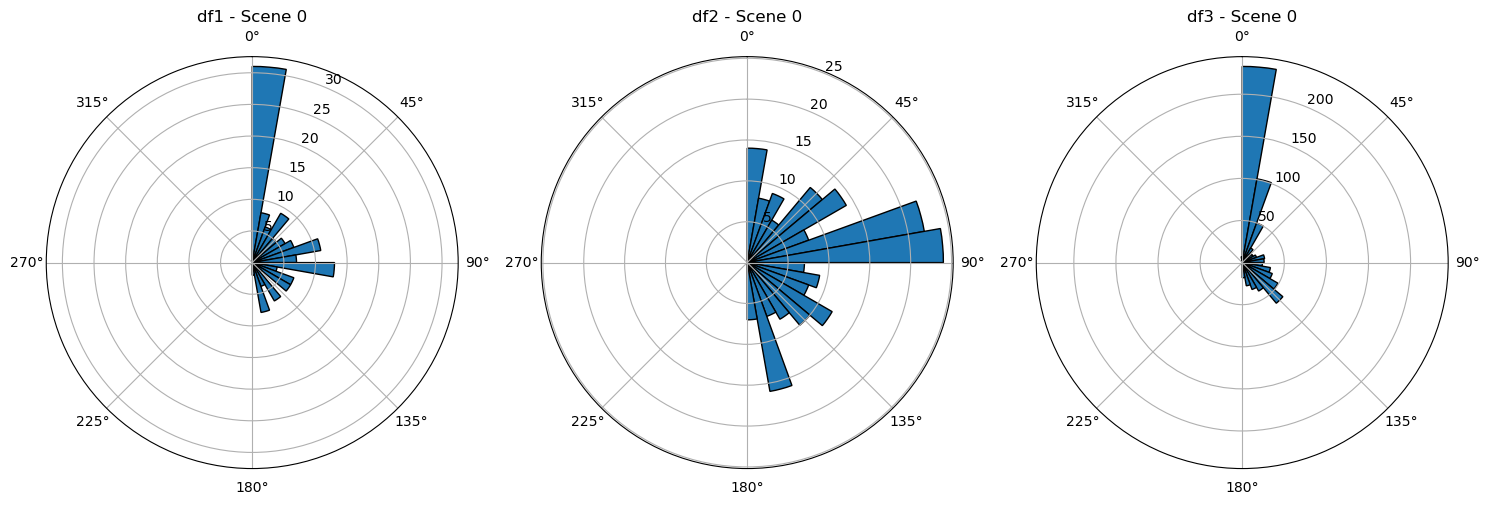

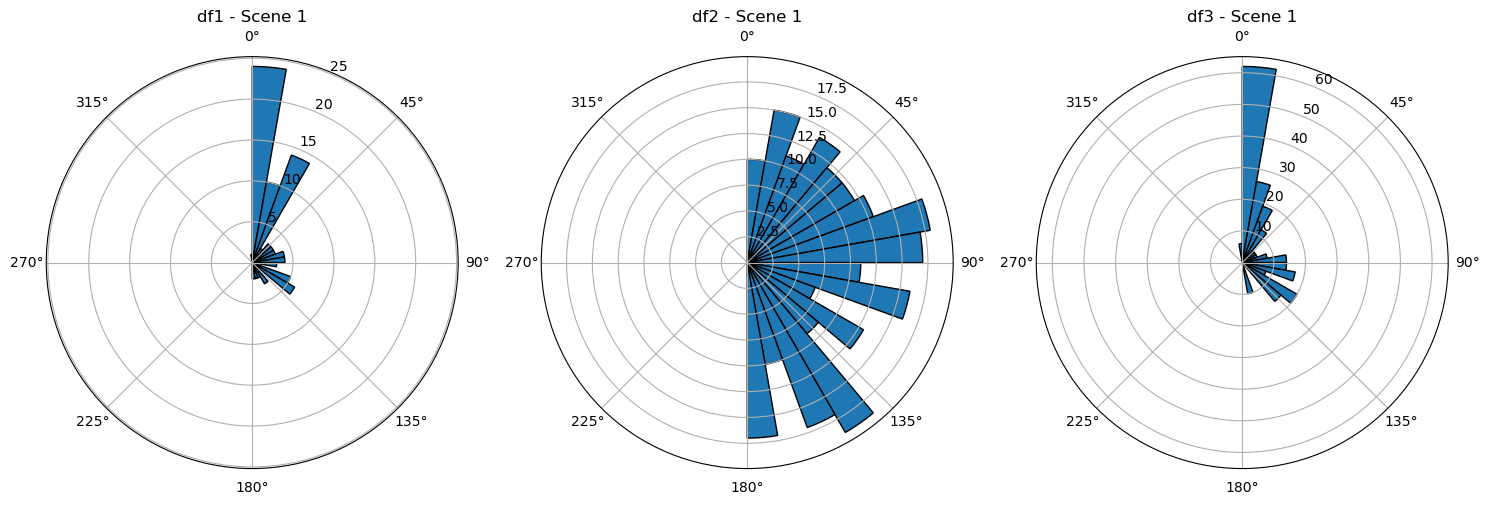

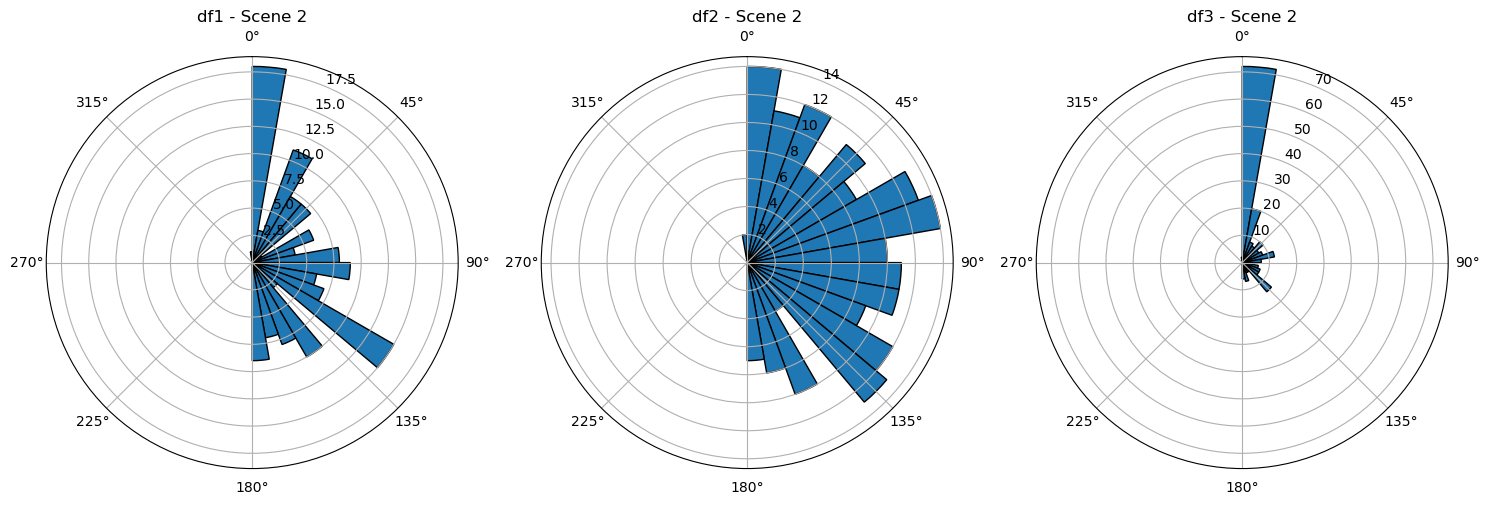

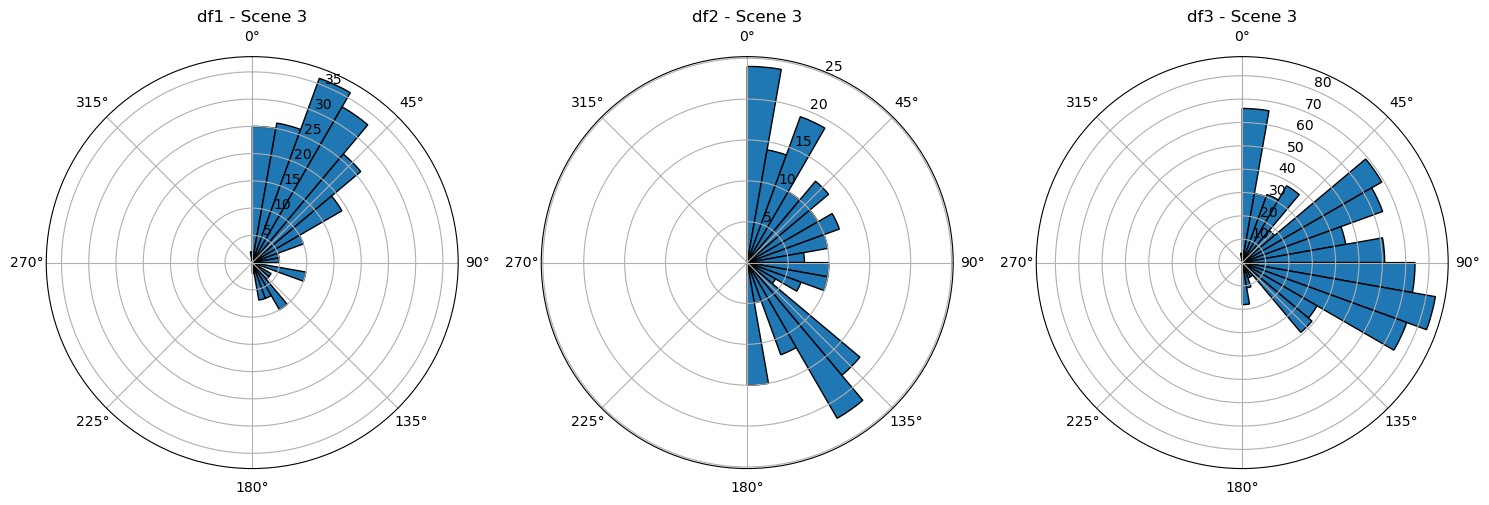

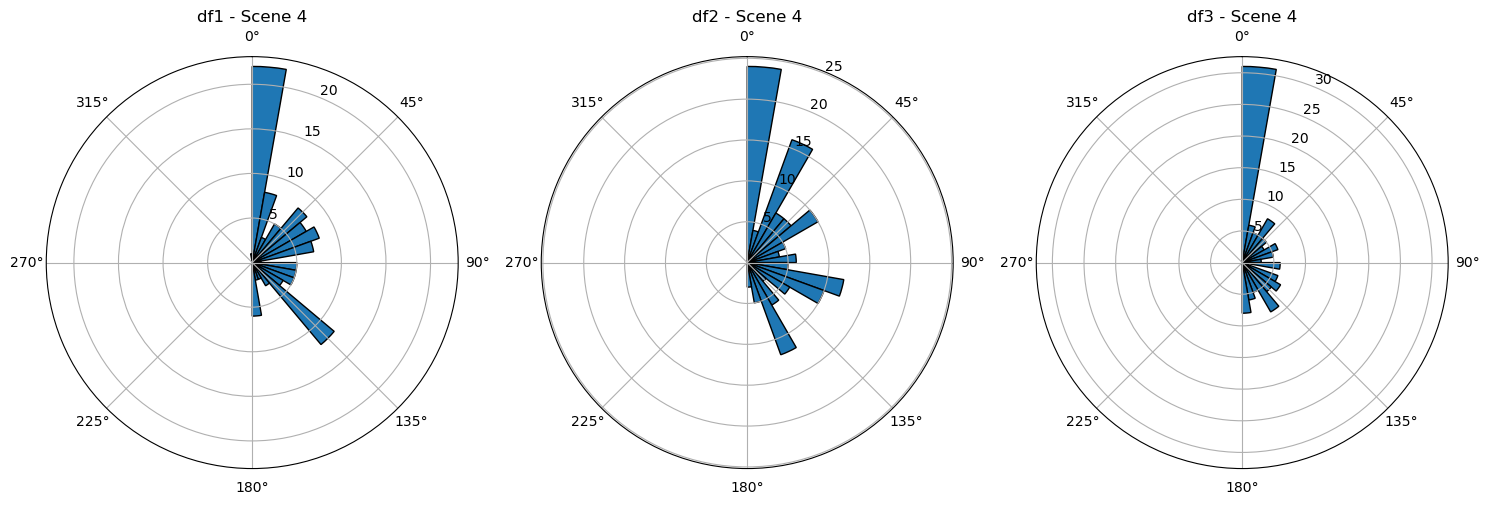

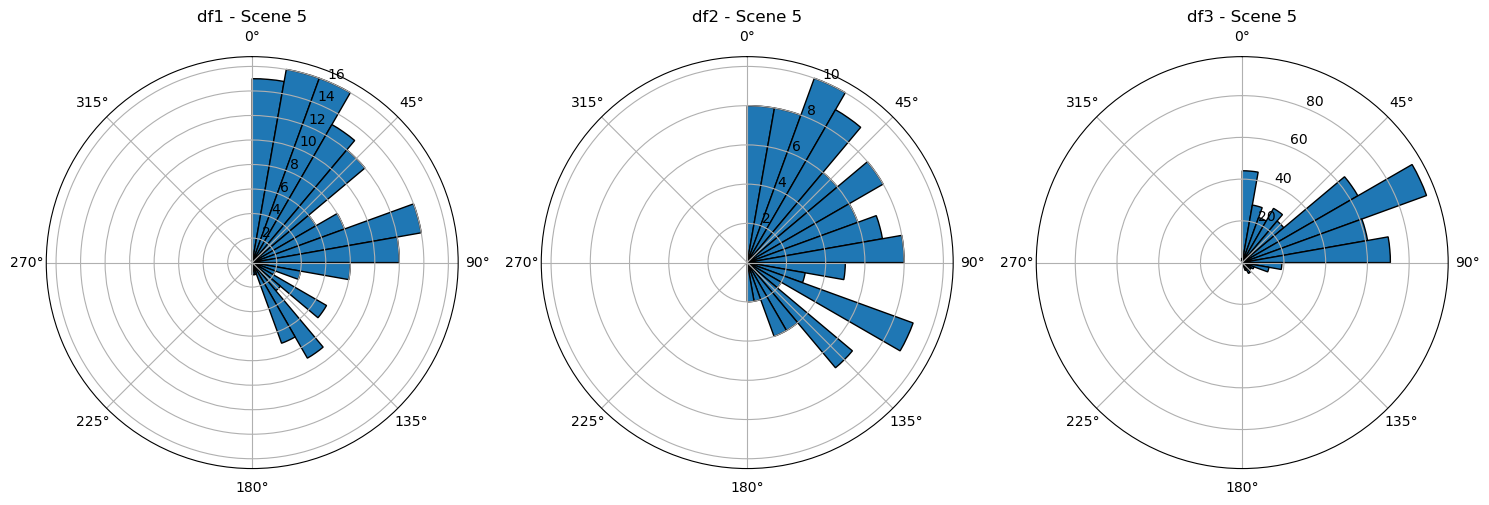

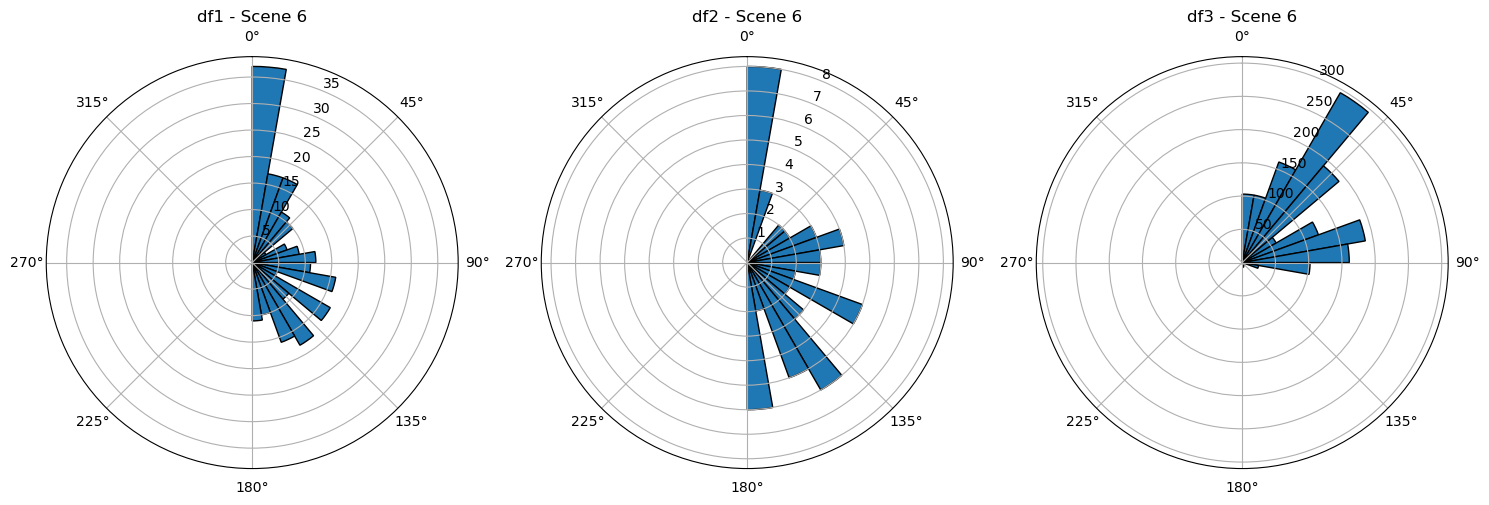

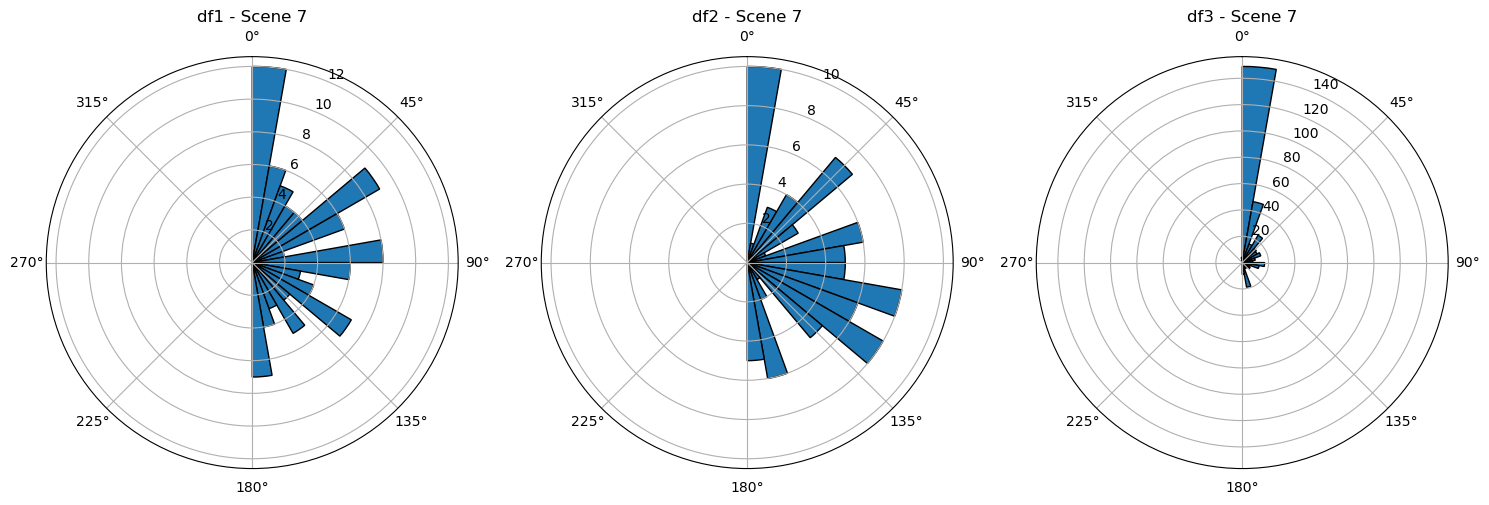

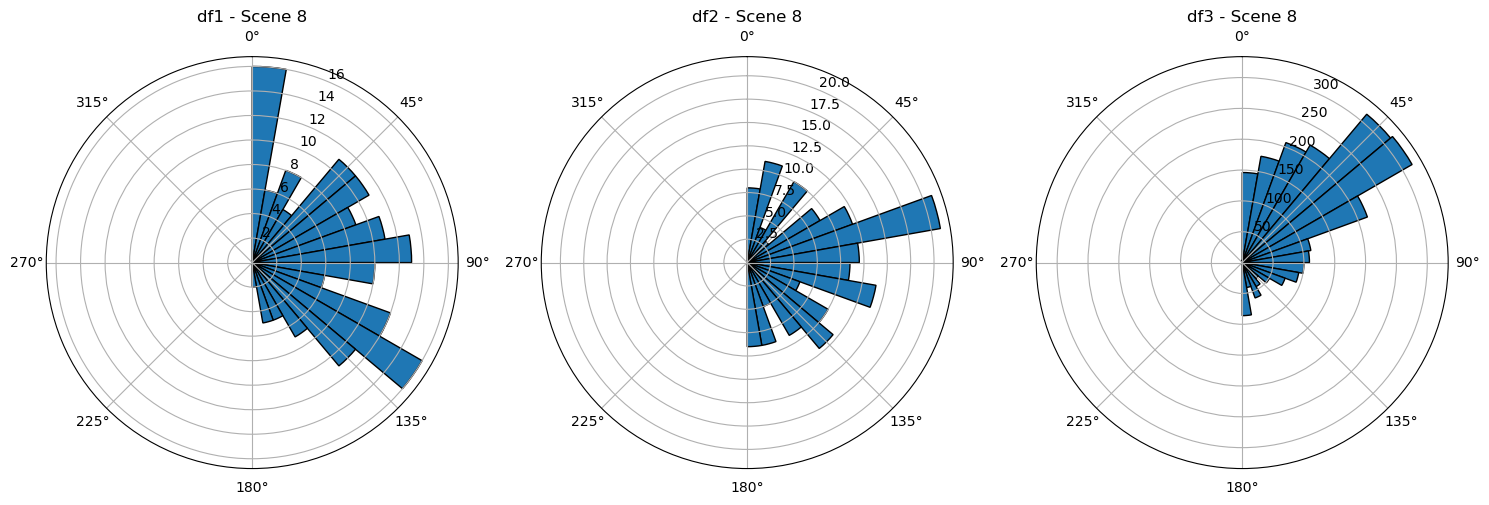

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df1, df2, df3, and df4 are already loaded

# Add a column to each DataFrame to identify its source
df1['source'] = 'df1'
df2['source'] = 'df2'
df3['source'] = 'df3'


# Combine all DataFrames into one
combined_df = pd.concat([df1, df2, df3])

# Function to plot polar histograms for each DataFrame side by side
def plot_combined_polar_histograms(combined_df, scene_value):
    # Filter the DataFrame for the given scene value
    filtered_df = combined_df[combined_df['Scene'] == scene_value]
    
    # Get the unique sources
    sources = filtered_df['source'].unique()

    # Number of bins for the histogram
    num_bins = 36

    # Create a figure with subplots
    fig, axes = plt.subplots(1, len(sources), subplot_kw=dict(polar=True), figsize=(15, 6))

    for ax, source in zip(axes, sources):
        # Filter by source
        source_df = filtered_df[filtered_df['source'] == source]

        # Extract the GameObjectRotX values
        rot_x_values = source_df['GameObjectRotX']

        # Compute histogram
        counts, bin_edges = np.histogram(rot_x_values, bins=num_bins, range=(-np.pi, np.pi))
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        # Plot the histogram
        ax.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], edgecolor='k')
        ax.set_title(f'{source} - Scene {scene_value}')
        ax.set_theta_zero_location('N')
        ax.set_theta_direction(-1)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Example usage for a specific scene value
scene_values = combined_df['Scene'].unique()
for scene in scene_values:
    plot_combined_polar_histograms(combined_df, scene)


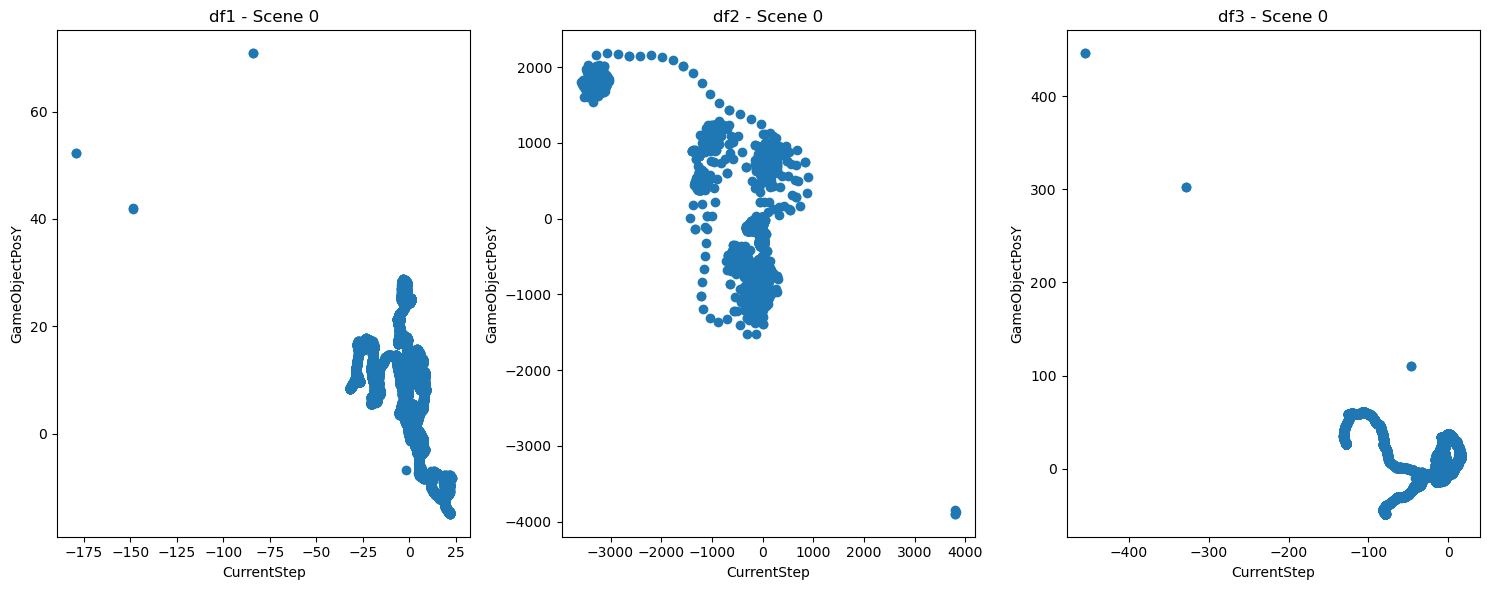

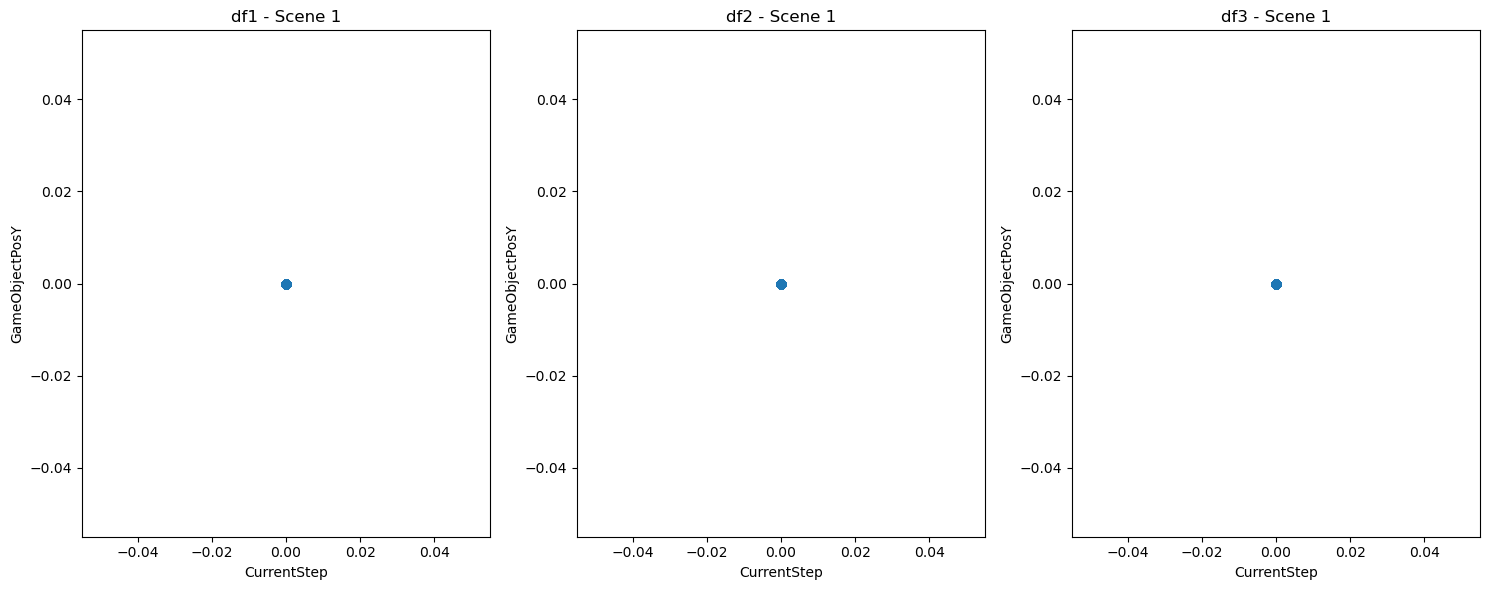

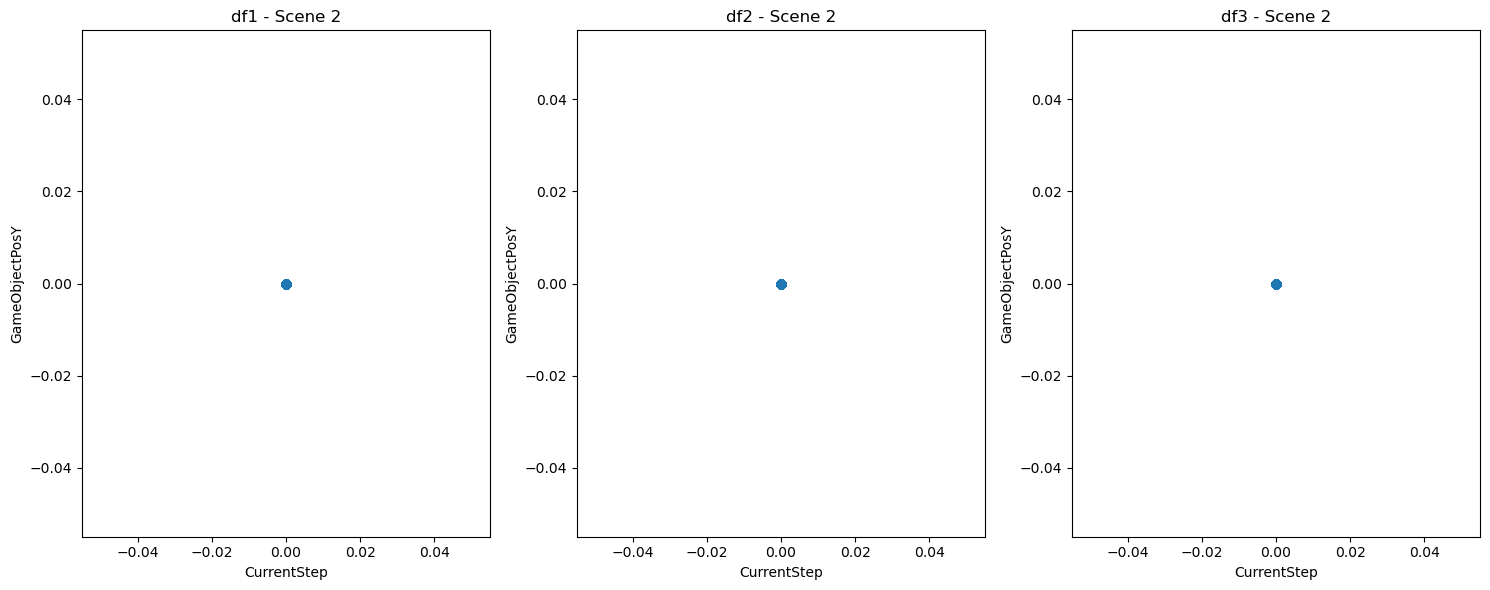

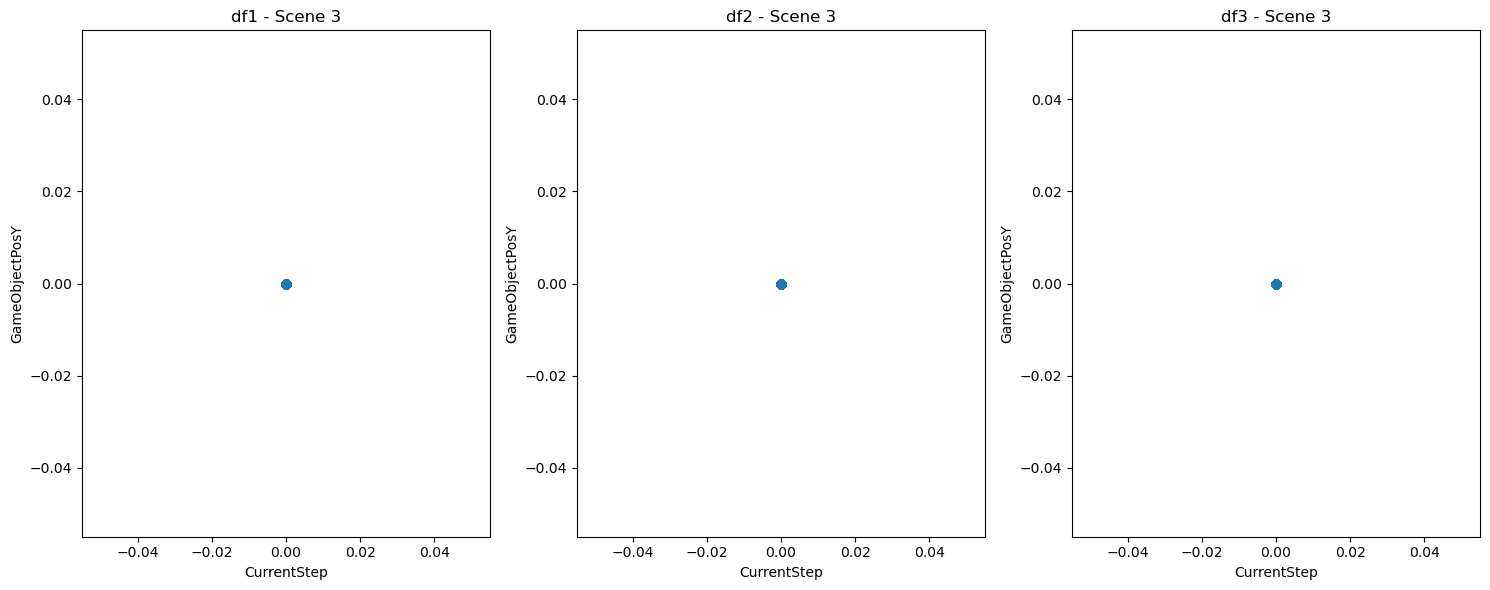

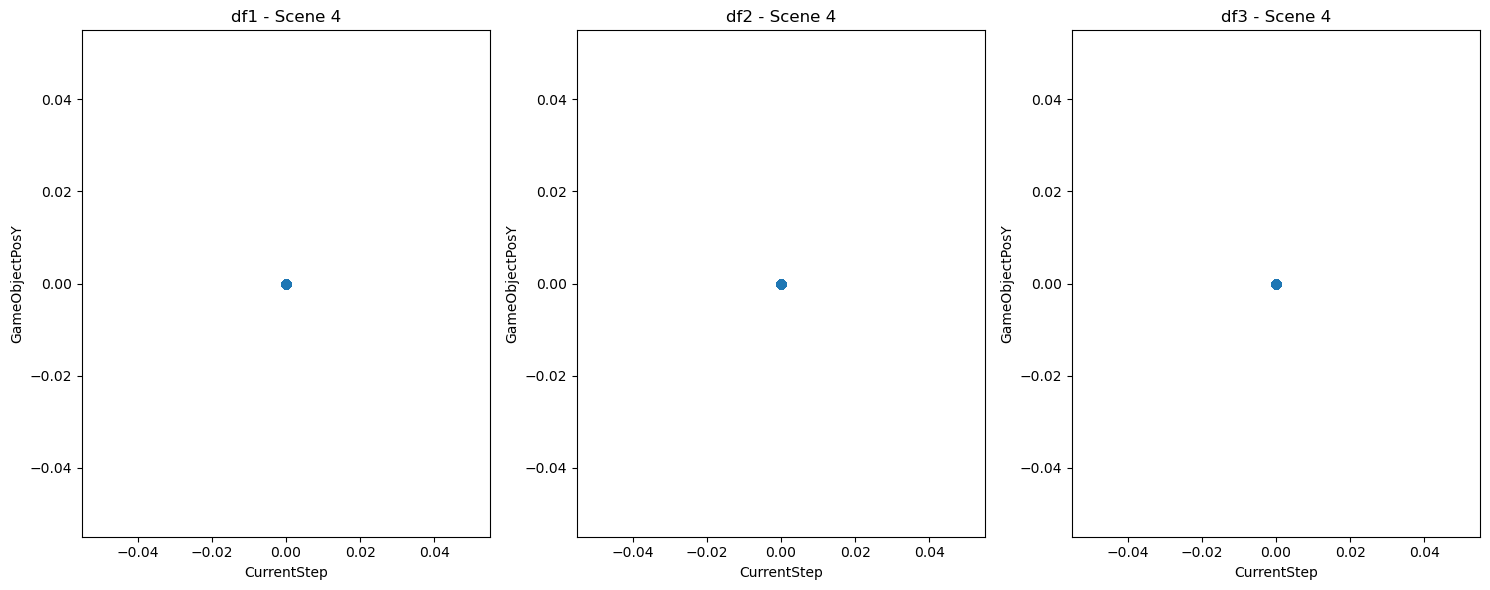

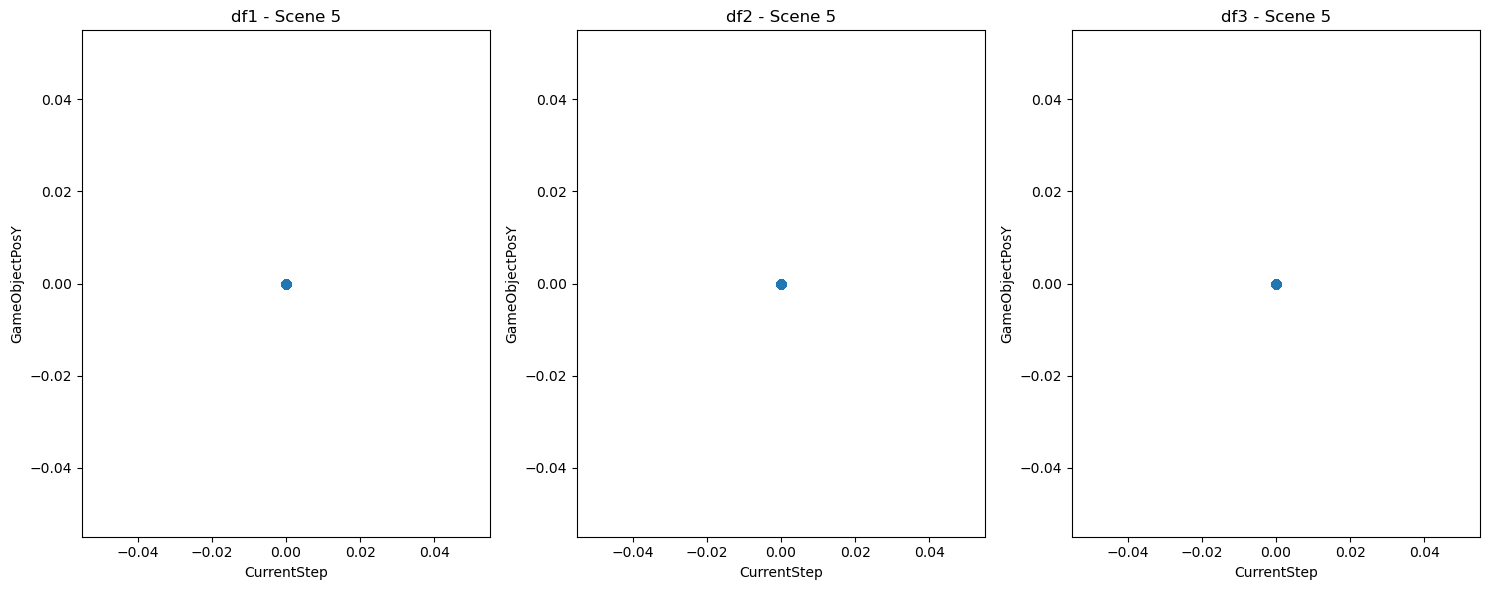

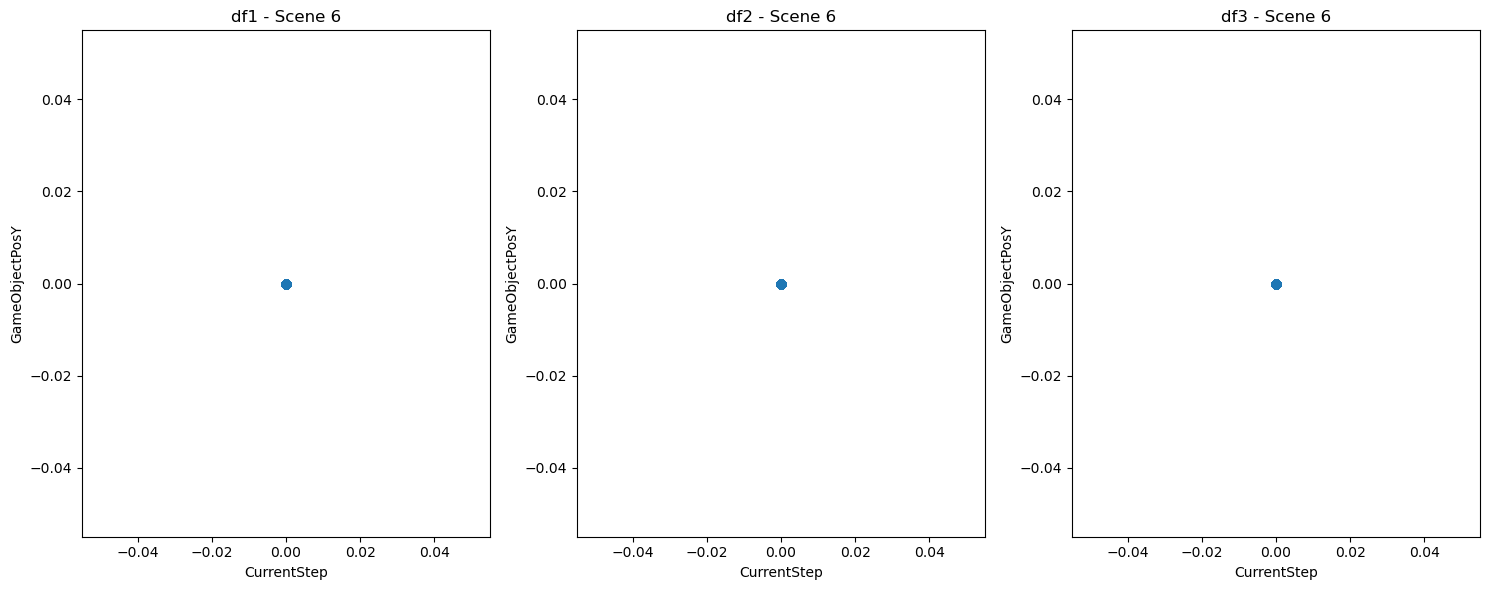

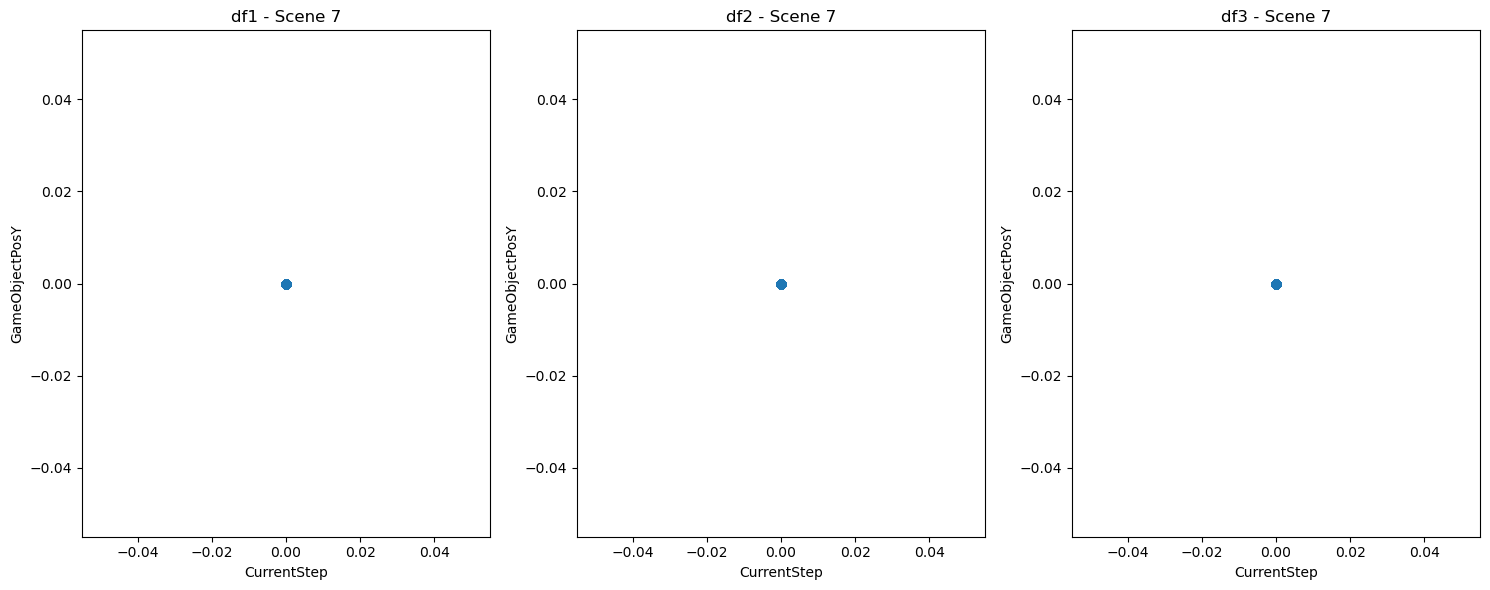

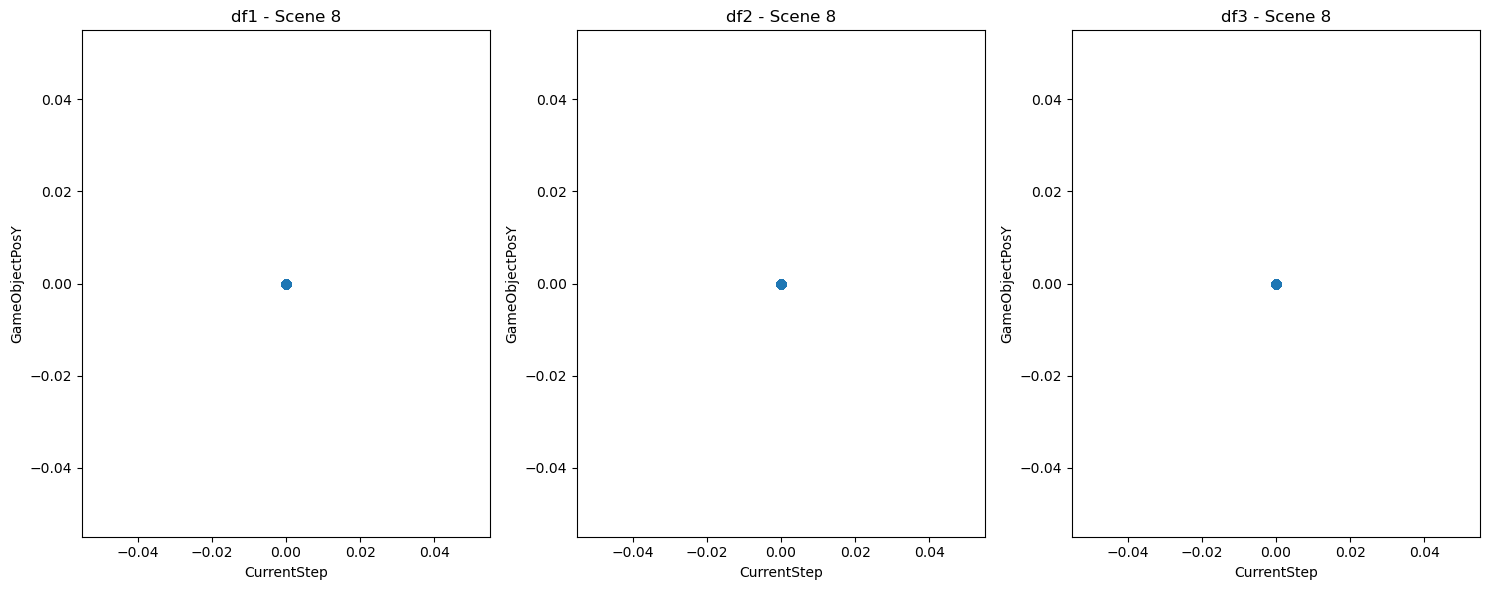

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1, df2, df3, and df4 are already loaded

# Add a column to each DataFrame to identify its source
df1['source'] = 'df1'
df2['source'] = 'df2'
df3['source'] = 'df3'


# Combine all DataFrames into one
combined_df = pd.concat([df1, df2, df3])

# Function to plot CurrentStep vs GameObjectPosY for each DataFrame
def plot_combined_steps_vs_posy(combined_df, scene_value):
    # Filter the DataFrame for the given scene value
    filtered_df = combined_df[combined_df['Scene'] == scene_value]
    
    # Get the unique sources
    sources = filtered_df['source'].unique()

    # Create a figure with subplots
    fig, axes = plt.subplots(1, len(sources), figsize=(15, 6))

    for ax, source in zip(axes, sources):
        # Filter by source
        source_df = filtered_df[filtered_df['source'] == source]

        # Plot CurrentStep vs GameObjectPosY
        ax.scatter(source_df['CurrentStep'], source_df['GameObjectPosY'])
        ax.set_title(f'{source} - Scene {scene_value}')
        ax.set_xlabel('CurrentStep')
        ax.set_ylabel('GameObjectPosY')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Example usage for a specific scene value
scene_values = combined_df['Scene'].unique()
for scene in scene_values:
    plot_combined_steps_vs_posy(combined_df, scene)
